In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('df_jpm.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,RMW,CMA,SMB_5,yest_close,stock_return,log_return
0,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,-1.34,-0.65,0.14,55.047691,0.038599,0.000000
1,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,0.39,-0.01,-0.31,57.172466,-0.010150,-0.010202
2,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,-0.39,-0.38,0.84,56.592175,0.001893,0.001891
3,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.18,0.26,-0.32,0.001,-0.21,0.08,0.24,56.699303,-0.000787,-0.000788
4,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,1.43,0.68,-0.34,0.001,-0.10,-0.39,0.61,56.654667,0.017019,0.016875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2020-04-24,90.639999,91.099998,88.489998,90.709999,90.709999,15815300,1.44,0.32,-0.09,0.000,-0.14,0.16,0.29,89.389999,0.014767,0.014659
991,2020-04-27,91.940002,95.629997,91.540001,94.620003,94.620003,22870200,1.73,1.65,2.74,0.000,-0.12,0.20,2.20,90.709999,0.043104,0.042201
992,2020-04-28,97.809998,98.360001,95.029999,95.290001,95.290001,20238900,-0.44,0.87,2.89,0.000,1.39,0.74,1.65,94.620003,0.007081,0.007056
993,2020-04-29,99.080002,99.449997,97.269997,97.860001,97.860001,20462600,2.92,1.87,2.04,0.000,1.22,-0.81,2.27,95.290001,0.026970,0.026613


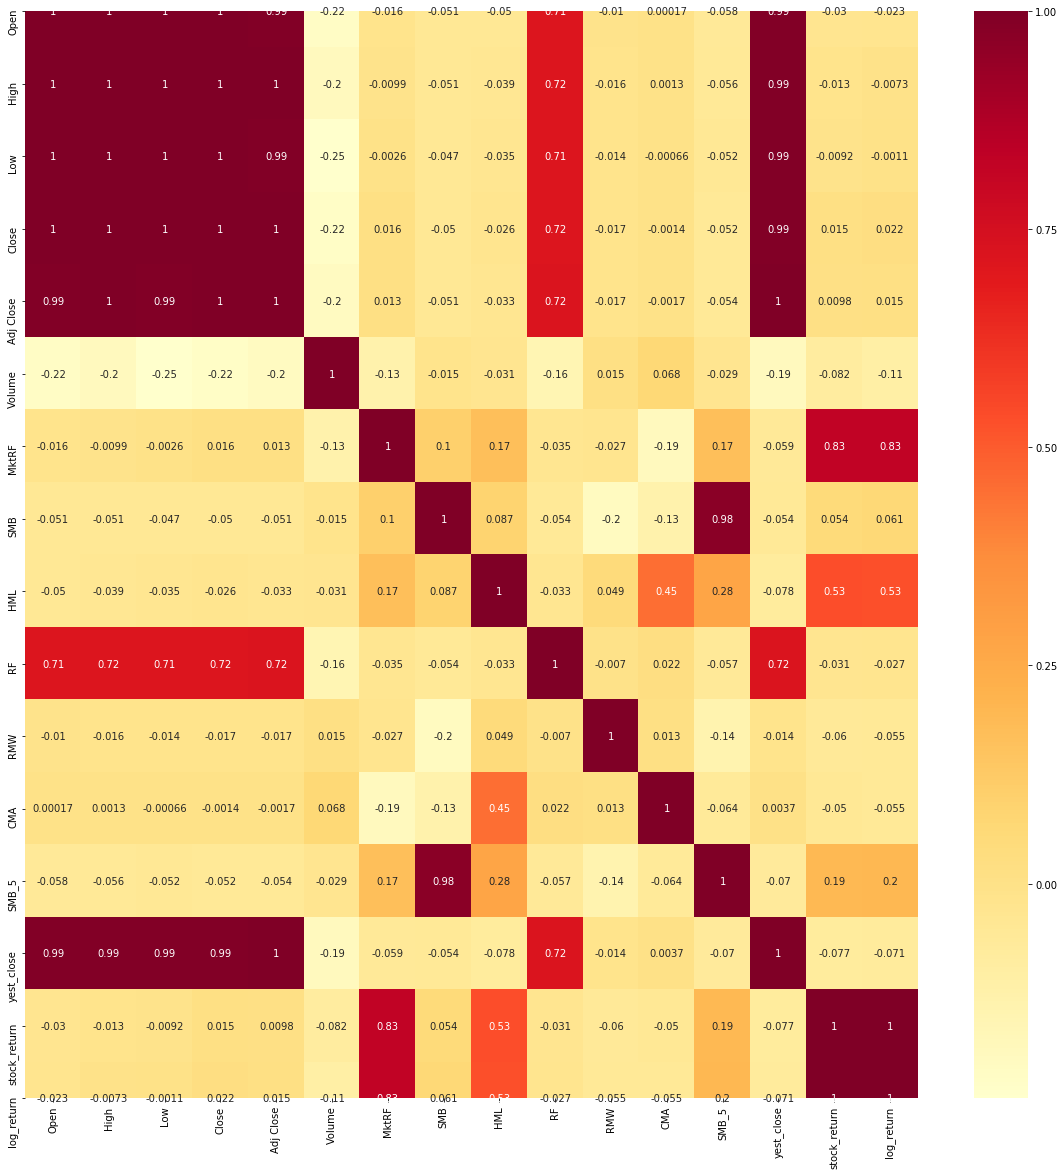

In [31]:
x = df.iloc[1:, 1:]
y = df.iloc[:, -2]
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
hm = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "YlOrRd")

In [21]:
list1 = ['Date', 'stock_return']
x = df.drop(list1, axis = 1)
x.head()

,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,RMW,CMA,SMB_5,yest_close,log_return
0,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,-1.34,-0.65,0.14,55.047691,0.000000
1,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,0.39,-0.01,-0.31,57.172466,-0.010202
2,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,-0.39,-0.38,0.84,56.592175,0.001891
3,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.18,0.26,-0.32,0.001,-0.21,0.08,0.24,56.699303,-0.000788
4,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,1.43,0.68,-0.34,0.001,-0.10,-0.39,0.61,56.654667,0.016875


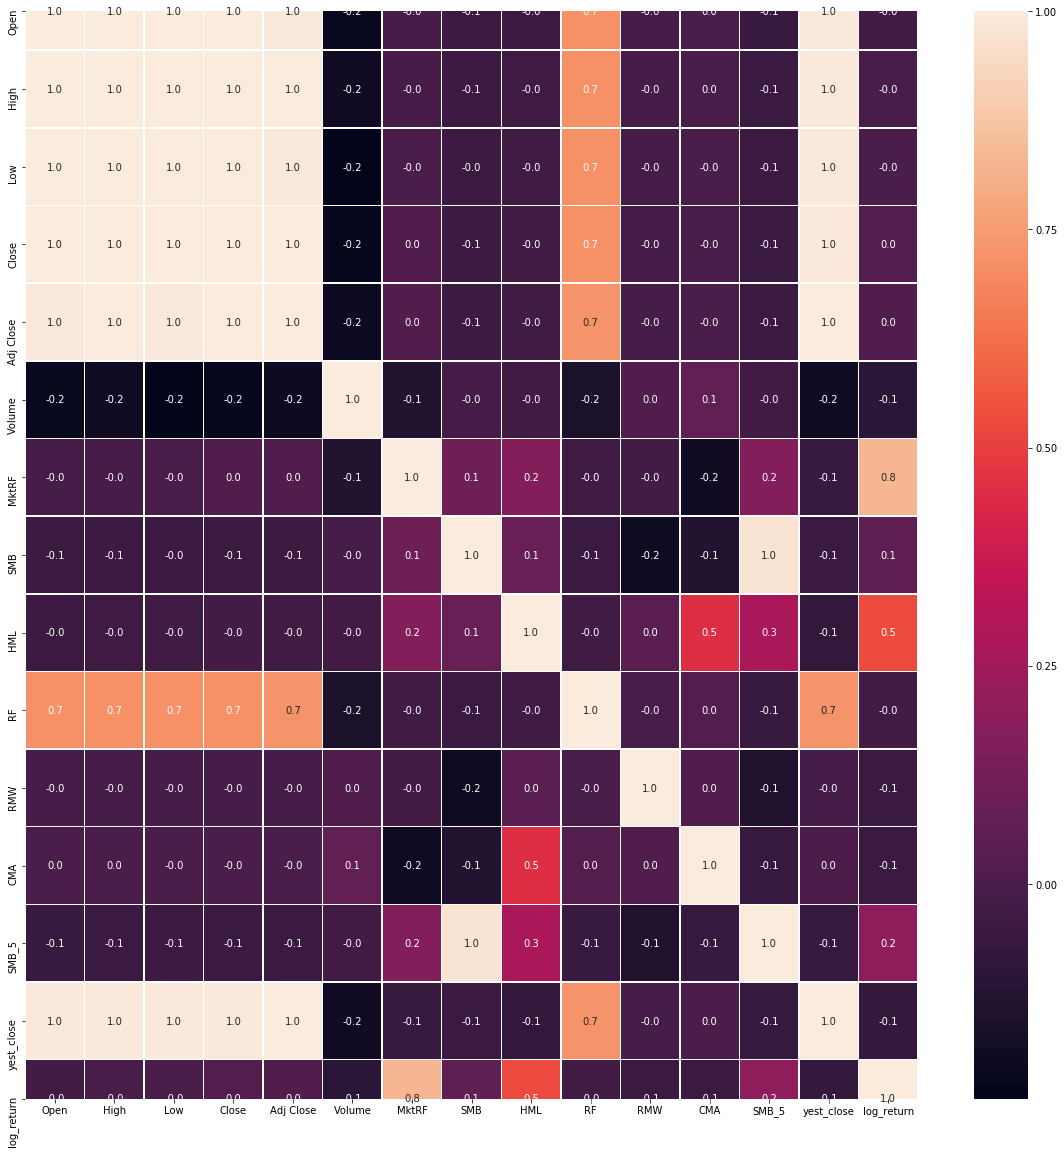

In [24]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(x.corr(), annot = True, linewidth = .5, fmt = '.1f', ax=ax)

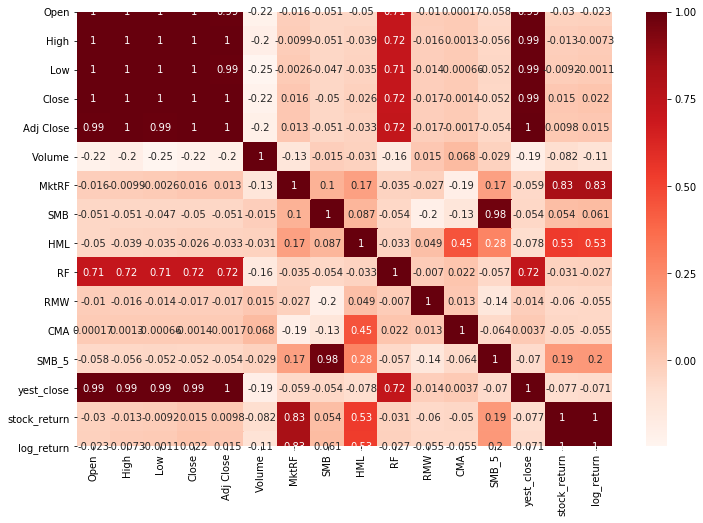

,index,stock_return
0,Volume,0.082286
1,MktRF,0.825232
2,SMB,0.053661
3,HML,0.534297
4,RMW,0.060131
5,CMA,0.049963
6,SMB_5,0.193233
7,yest_close,0.076538
8,stock_return,1.000000
9,log_return,0.995687


In [35]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["stock_return"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.04]

relevant_features = relevant_features.reset_index()

relevant_features.sort_values(by='stock_return',ascending=False)
relevant_features